In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
# 경로 변수 (고정)

dataLoc = '../_data/'
trainfile = 'train_03_997.csv'
old_trainfile = 'train.csv'
testfile = 'test_clean.csv'
old_testfile = 'test.csv'

In [2]:
# train_03_997.csv
taxi_df = pd.read_csv(dataLoc + trainfile)
taxi_df['p_dt'] = pd.to_datetime(taxi_df['p_dt'])
taxi_df.head()

,p_dt,pas,p_lng,p_lat,d_lng,d_lat,dur
0,2016-04-30 23:59:00,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,2016-04-30 23:59:00,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,2016-04-30 23:59:00,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,2016-04-30 23:58:00,1,-73.985733,40.738258,-73.993179,40.754890,800
4,2016-04-30 23:58:00,1,-74.006615,40.740650,-73.985619,40.723362,1151


In [3]:
# test_clean.csv
test_df = pd.read_csv(dataLoc + testfile)
test_df['p_dt'] = pd.to_datetime(test_df['p_dt'])
test_df.head()

,p_dt,pas,p_lng,p_lat,d_lng,d_lat
0,2016-06-30 23:59:00,5,-73.998291,40.722618,-73.971779,40.762470
1,2016-06-30 23:59:00,2,-73.955109,40.689564,-73.978203,40.685802
2,2016-06-30 23:59:00,1,-73.978416,40.791576,-73.973160,40.675968
3,2016-06-30 23:59:00,2,-73.873093,40.774097,-73.926704,40.856739
4,2016-06-30 23:58:00,1,-73.979416,40.755211,-74.003548,40.738224


In [4]:
max(test_df['p_lat'])

51.881084440000002

In [5]:
taxi_df['p_dt'].dt.hour.head()

0    23
1    23
2    23
3    23
4    23
Name: p_dt, dtype: int64

In [7]:
taxi_df['p_dt'].dt.dayofweek.head()

0    5
1    5
2    5
3    5
4    5
Name: p_dt, dtype: int64

In [8]:
copy_df = taxi_df.copy()
copy_df.head()

,p_dt,pas,p_lng,p_lat,d_lng,d_lat,dur
0,2016-04-30 23:59:00,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,2016-04-30 23:59:00,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,2016-04-30 23:59:00,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,2016-04-30 23:58:00,1,-73.985733,40.738258,-73.993179,40.754890,800
4,2016-04-30 23:58:00,1,-74.006615,40.740650,-73.985619,40.723362,1151


In [9]:
copy_df.insert(loc=1, column='hr', value=copy_df['p_dt'].dt.hour)

In [12]:
dow_conv = {0 : 'M', 1 : 'T', 2 : 'W', 3 : 'R', 4 : 'F', 5 : 'Sa', 6 : 'Su'}

copy_df.insert(loc=1, column='dow', value=copy_df['p_dt'].dt.dayofweek)

In [14]:
copy_df = copy_df.replace({'dow' : dow_conv})

In [17]:
copy_df.head()

,p_dt,dow,hr,pas,p_lng,p_lat,d_lng,d_lat,dur
0,2016-04-30 23:59:00,Sa,23,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,2016-04-30 23:59:00,Sa,23,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,2016-04-30 23:59:00,Sa,23,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,2016-04-30 23:58:00,Sa,23,1,-73.985733,40.738258,-73.993179,40.754890,800
4,2016-04-30 23:58:00,Sa,23,1,-74.006615,40.740650,-73.985619,40.723362,1151


In [20]:
del copy2_df['p_dt']
copy2_df.head()

,dow,hr,pas,p_lng,p_lat,d_lng,d_lat,dur
0,Sa,23,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,Sa,23,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,Sa,23,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,Sa,23,1,-73.985733,40.738258,-73.993179,40.754890,800
4,Sa,23,1,-74.006615,40.740650,-73.985619,40.723362,1151


In [27]:
copy2_df.to_csv("../_data/171016_dow_hr_L2_temp.csv", index=False)

In [30]:
todel = ['p_lng', 'p_lat', 'd_lng', 'd_lat']

for thing in todel:
    del copy2_df[thing]

In [31]:
copy2_df.head()

,dow,hr,pas,L2,dur
0,Sa,23,1,0.069424,1454
1,Sa,23,1,0.057791,1409
2,Sa,23,2,0.066698,1081
3,Sa,23,1,0.018223,800
4,Sa,23,1,0.027198,1151


In [33]:
copy2_df.to_csv("../_data/171016_dow_hr_pas_L2_dur_only.csv", index=False)

In [14]:
taxi_df.insert(loc=1, column='hr', value=taxi_df['p_dt'].dt.hour)


taxi_df.head()

,p_dt,hr,pas,p_lng,p_lat,d_lng,d_lat,dur
0,2016-04-30 23:59:00,23,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,2016-04-30 23:59:00,23,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,2016-04-30 23:59:00,23,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,2016-04-30 23:58:00,23,1,-73.985733,40.738258,-73.993179,40.754890,800
4,2016-04-30 23:58:00,23,1,-74.006615,40.740650,-73.985619,40.723362,1151


In [6]:
taxi_df['p_dt'].dt.dayofyear.head()

0    121
1    121
2    121
3    121
4    121
Name: p_dt, dtype: int64

In [22]:
def dist(plng, plat, dlng, dlat):
    return ((dlng-plng)**2 + (dlat-plat)**2) ** 0.5

# test case
aaa = taxi_df.copy()
aaa['new'] = np.vectorize(dist)(\
                aaa['p_lng'], aaa['p_lat'], aaa['d_lng'], aaa['d_lat'])
aaa.head()

,p_dt,pas,p_lng,p_lat,d_lng,d_lat,dur,new
0,2016-04-30 23:59:00,1,-73.987793,40.724792,-73.975616,40.656445,1454,0.069424
1,2016-04-30 23:59:00,1,-73.957596,40.717770,-73.951424,40.775230,1409,0.057791
2,2016-04-30 23:59:00,2,-74.000954,40.742031,-73.947708,40.782200,1081,0.066698
3,2016-04-30 23:58:00,1,-73.985733,40.738258,-73.993179,40.754890,800,0.018223
4,2016-04-30 23:58:00,1,-74.006615,40.740650,-73.985619,40.723362,1151,0.027198


In [23]:
copy2_df['L2'] = np.vectorize(dist)(\
                copy2_df['p_lng'], copy2_df['p_lat'],\
                copy2_df['d_lng'], copy2_df['d_lat'])

copy2_df.head()

,dow,hr,pas,p_lng,p_lat,d_lng,d_lat,dur,L2
0,Sa,23,1,-73.987793,40.724792,-73.975616,40.656445,1454,0.069424
1,Sa,23,1,-73.957596,40.717770,-73.951424,40.775230,1409,0.057791
2,Sa,23,2,-74.000954,40.742031,-73.947708,40.782200,1081,0.066698
3,Sa,23,1,-73.985733,40.738258,-73.993179,40.754890,800,0.018223
4,Sa,23,1,-74.006615,40.740650,-73.985619,40.723362,1151,0.027198


In [26]:
copy2_df.insert(loc=7, column='L2', value=np.vectorize(dist)(\
                copy2_df['p_lng'], copy2_df['p_lat'],\
                copy2_df['d_lng'], copy2_df['d_lat']))

copy2_df.head()

,dow,hr,pas,p_lng,p_lat,d_lng,d_lat,L2,dur
0,Sa,23,1,-73.987793,40.724792,-73.975616,40.656445,0.069424,1454
1,Sa,23,1,-73.957596,40.717770,-73.951424,40.775230,0.057791,1409
2,Sa,23,2,-74.000954,40.742031,-73.947708,40.782200,0.066698,1081
3,Sa,23,1,-73.985733,40.738258,-73.993179,40.754890,0.018223,800
4,Sa,23,1,-74.006615,40.740650,-73.985619,40.723362,0.027198,1151


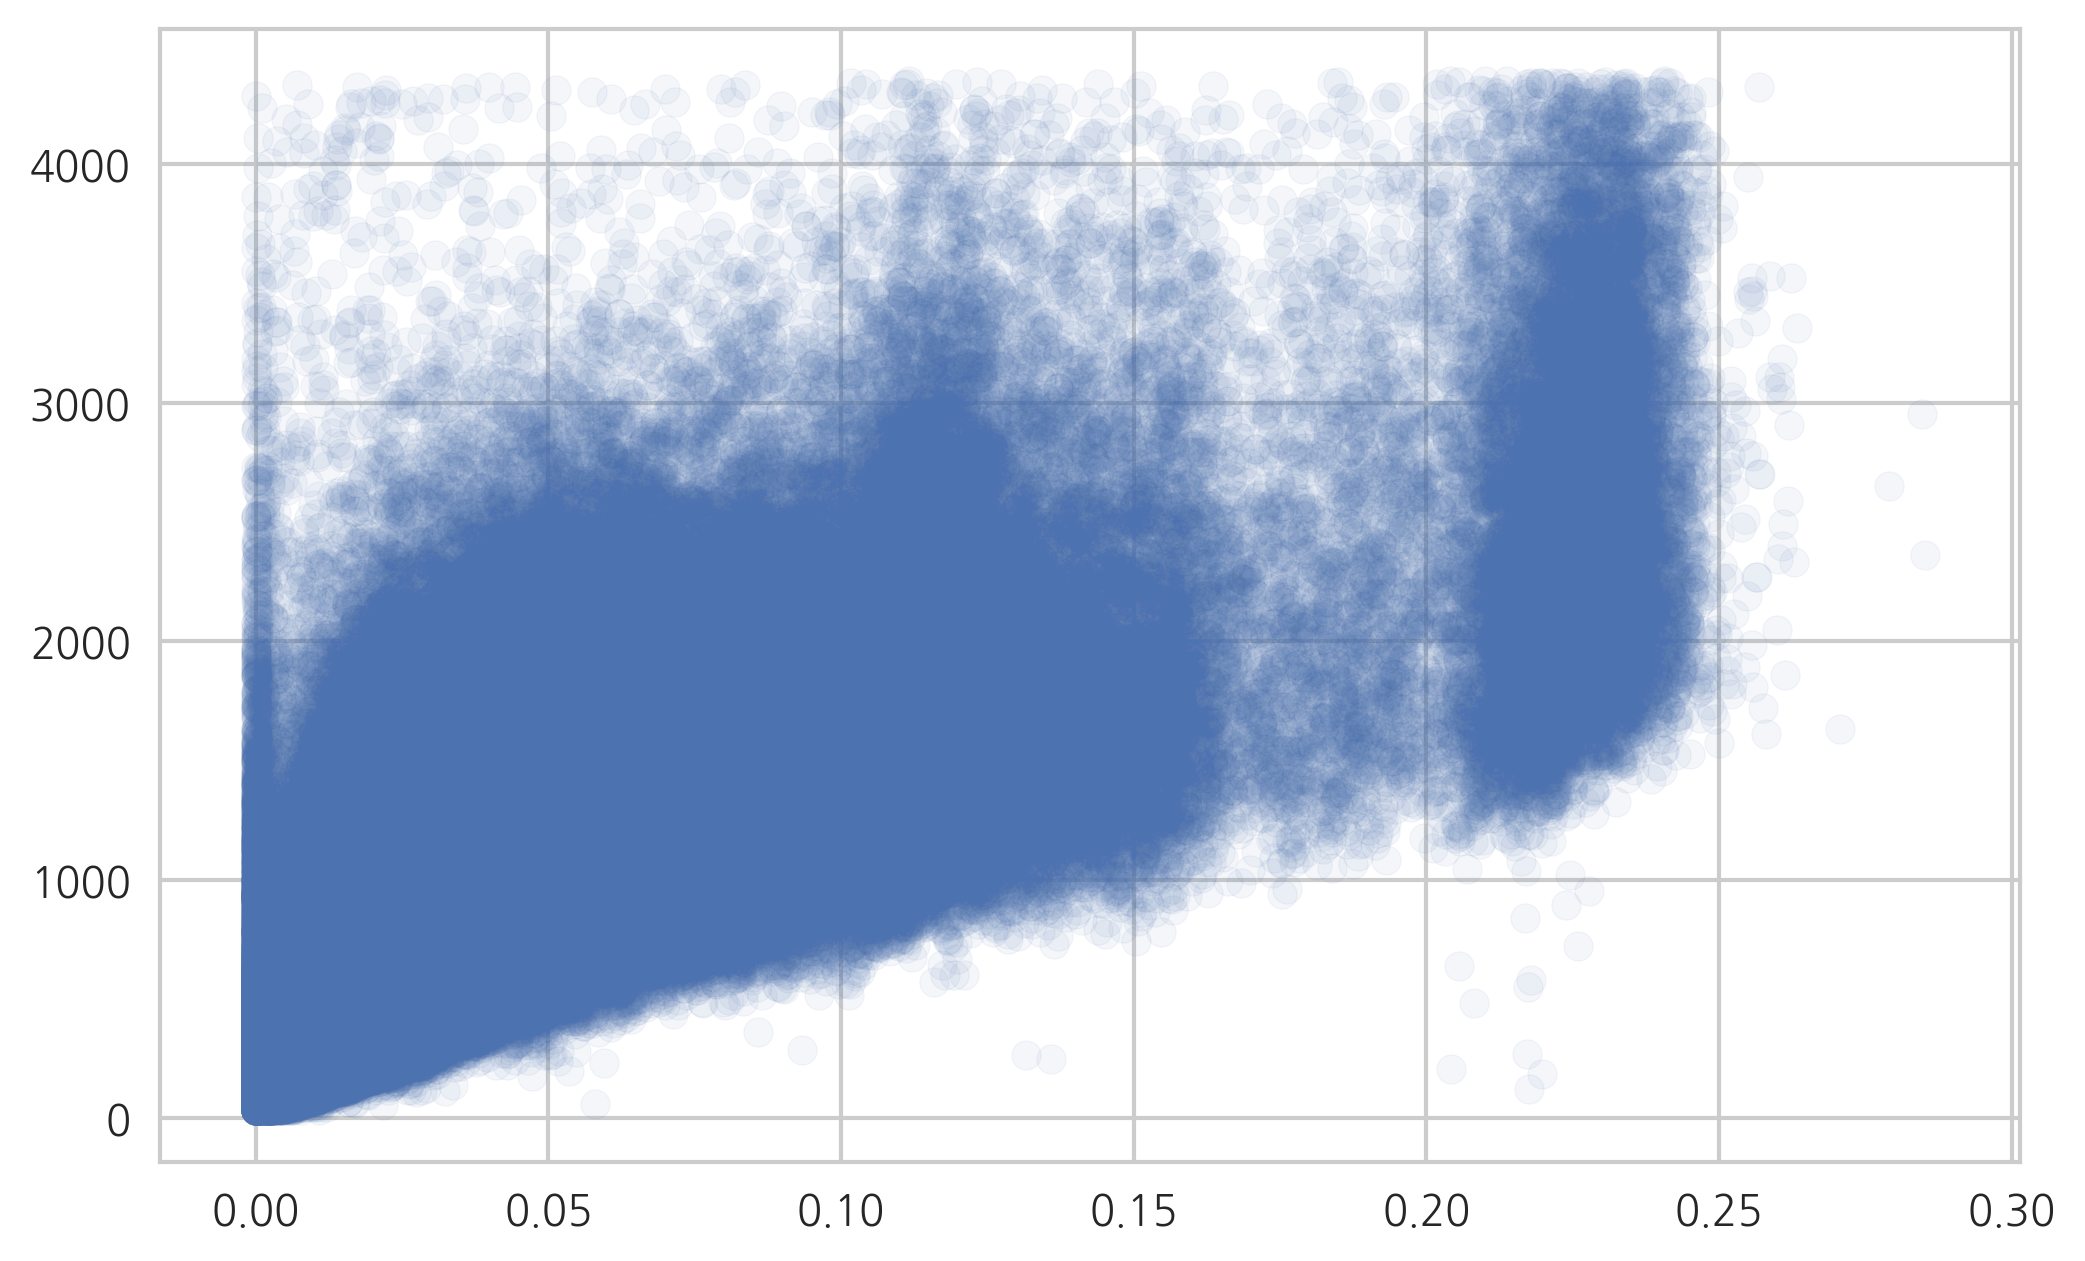

In [63]:
plt.scatter(taxi_df['L2'], taxi_df['dur'], alpha=0.06)
plt.show()

In [5]:
taxi_df.describe()

,pas,p_lng,p_lat,d_lng,d_lat,dur
count,682598.000000,682598.000000,682598.000000,682598.000000,682598.000000,682598.000000
mean,1.667216,-73.975209,40.751756,-73.974331,40.752307,787.538633
std,1.320444,0.033529,0.025644,0.030306,0.029294,570.515853
min,0.000000,-74.016121,40.643650,-74.033051,40.630604,33.000000
25%,1.000000,-73.991837,40.738094,-73.991287,40.736782,389.000000
50%,1.000000,-73.981918,40.754471,-73.979958,40.754696,640.000000
75%,2.000000,-73.968126,40.768291,-73.963882,40.769634,1021.000000
max,6.000000,-73.776794,40.823143,-73.778694,40.865940,4349.000000


In [36]:
df = pd.DataFrame([np.arange(10), np.arange(10)])
print(df[2].apply(lambda x: x**2))
df

0    4
1    4
Name: 2, dtype: int64


,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,0,1,2,3,4,5,6,7,8,9


In [6]:
%matplotlib inline

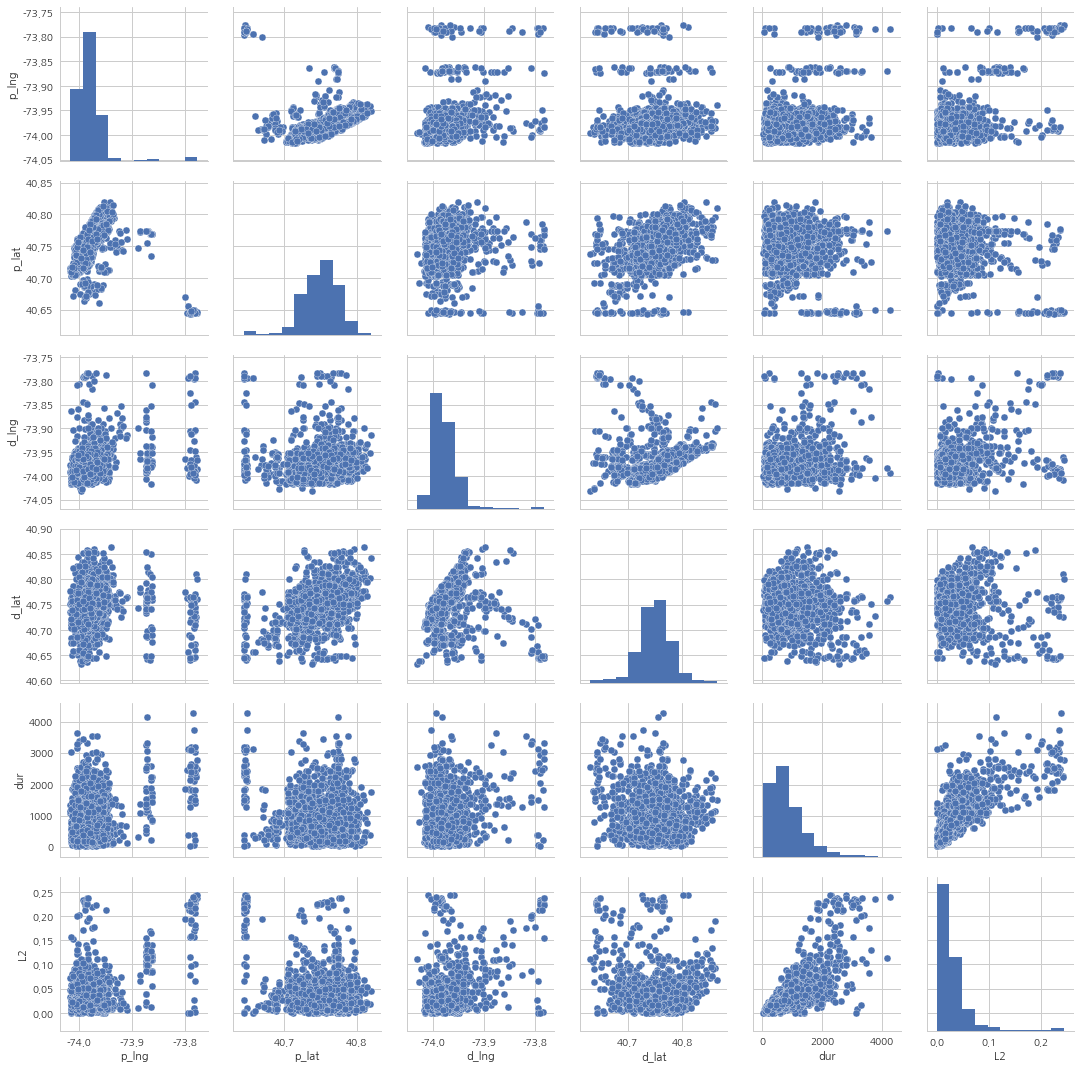

In [13]:
cols = ['p_lng', 'p_lat', 'd_lng', 'd_lat', 'dur']
plt.figure(figsize=(6, 6))
sns.pairplot(taxi_df.iloc[:3000, 2:])

In [36]:
new_df = pd.read_csv("../_data/171016_dow_hr_pas_L2_dur_only.csv")

new_df.shape

(682598, 5)

In [45]:
new_df.iloc[10000]

dow            F
hr            12
pas            1
L2     0.0428135
dur         1609
Name: 10000, dtype: object

In [37]:
from patsy import dmatrix

In [41]:
model0 = sm.OLS.from_formula("dur ~ C(dow) + C(hr) + C(pas) + L2", data=new_df)

In [43]:
print(model0.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 2.975e+04
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:53:22   Log-Likelihood:            -4.9786e+06
No. Observations:              682598   AIC:                         9.957e+06
Df Residuals:                  682561   BIC:                         9.958e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      516.4183    102.779      5.025   

In [46]:
model1 = sm.OLS.from_formula("dur ~ C(dow) + C(hr) + L2", data=new_df)

In [47]:
print(model1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 3.566e+04
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:58:06   Log-Likelihood:            -4.9789e+06
No. Observations:              682598   AIC:                         9.958e+06
Df Residuals:                  682567   BIC:                         9.958e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      335.2862      2.529    132.598   

In [48]:
model2 = sm.OLS.from_formula("dur ~ C(dow) + C(hr) + L2 - 1", data=new_df)

In [49]:
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 3.566e+04
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:05:54   Log-Likelihood:            -4.9789e+06
No. Observations:              682598   AIC:                         9.958e+06
Df Residuals:                  682567   BIC:                         9.958e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(dow)[F]     335.2862      2.529    132.598      

In [ ]:
# to do:
# prepare test.csv same way and try predicting